In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")   

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")

C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\1760764839.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [6]:
df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [7]:
df.apply(pd.unique).to_frame("Unique Values")

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [8]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [9]:
df.describe(include="O")

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


<Axes: >

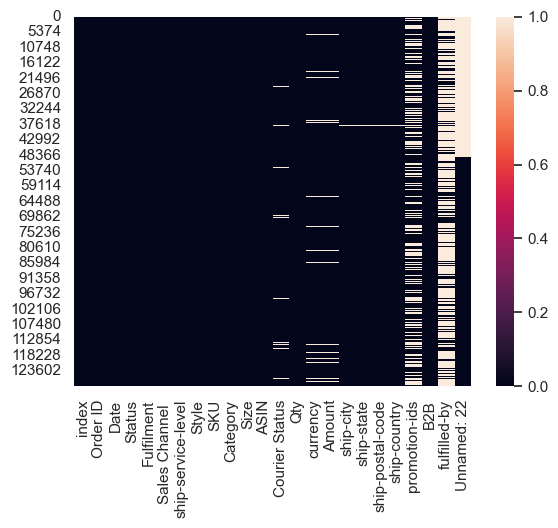

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum().to_frame("Number of Missing Values")

,Number of Missing Values
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


# Data Cleaning

## Dropping Columns

In [12]:
df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

## Dropping Duplicates 

In [13]:
df[df.duplicated(["Order ID","ASIN"],keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [14]:
len(df)-len(df.drop_duplicates(['Order ID','ASIN']))

7

In [15]:
df.drop_duplicates(["Order ID","ASIN"],inplace=True)

## Fill NA 

In [16]:
df['Courier Status'] = df['Courier Status'].fillna('unknown')

In [17]:
df['promotion-ids'] = df['promotion-ids'].fillna('no promotion')

In [18]:
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [19]:
df['Amount'] = df['Amount'].fillna(0)

In [20]:
df['ship-city'] = df['ship-city'].fillna('unknown')
df['ship-state'] = df['ship-state'].fillna('unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('unknown')

In [21]:
Dic = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}
df.rename(columns=Dic, inplace =True)

In [22]:
df.columns

Index(['order_ID', 'date', 'ship_status', 'fullfilment', 'service_level',
       'style', 'sku', 'product_category', 'size', 'asin',
       'courier_ship_status', 'order_quantity', 'order_amount', 'city',
       'state', 'zip', 'promotion', 'customer_type'],
      dtype='object')

In [23]:
df.replace({'customer_type': {True: 'business', False: 'customer'}}, inplace=True)


In [24]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [25]:

march_dates = df['date'][df['date'].dt.month == 3]

march_dates.dt.day.nunique()

1

In [26]:
df=df[df["date"].dt.month!=3]

In [27]:
df['month'] = df['date'].dt.month
df["month"].unique()

array([4, 5, 6], dtype=int32)

In [28]:
month_map = { 4: 'april',5: 'may',6: 'june'}
df['month'] = df['date'].dt.month.map(month_map)

In [29]:
month_order = ['april', 'may', 'june']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [30]:
print(f'This dataset contains the months {df["month"].unique()} for 2022')
print(f'The earliest date is {df["date"].min()}')
print(f'The latest date is {df["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


In [31]:
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']
df["size"]=pd.Categorical(df["size"],categories=size_order,ordered=True)

# Data Visualization 

Checking cleaned daata

In [32]:
df.describe(include="all")

,order_ID,date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount,city,state,zip,promotion,customer_type,month
count,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797.000000,128797.000000,128797,128797,128797.0,128797,128797,128797
unique,120220,NaN,13,2,2,1377,7194,9,11,7189,4,NaN,NaN,8953,70,9460.0,5784,2,3
top,403-4984515-8861958,NaN,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer,april
freq,12,NaN,77664,89543,88460,4221,772,50206,22679,772,109331,NaN,NaN,11200,22235,1004.0,49088,127926,49065
mean,NaN,2022-05-12 13:11:06.099365632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904439,609.392086,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,413.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,583.040000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,771.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,5584.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.isnull().sum().sum()

np.int64(0)

In [34]:
df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
order_ID,120220
date,90
ship_status,13
fullfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [35]:
df.apply(pd.unique).to_frame("Unique Values")

,Unique Values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
service_level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
asin,"[B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7..."


In [36]:
# Revenue by month
revenue_by_month = df.groupby('month', observed=False)['order_amount'].sum()

percent_decrease_apr_to_may = ((revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april']) * 100
percent_decrease_may_to_jun = ((revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may']) * 100
total_decrease = ((revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april']) * 100

print(f"Total revenue for April 2022: ₹{revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: ₹{revenue_by_month['may']:,.2f}, which is a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ₹{revenue_by_month['june']:,.2f}, which is a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%\n")

# Revenue by category
revenue_by_category = df.groupby('product_category', observed=False)['order_amount'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: f"₹{x:,.2f}"), "\n")

# Percentage of revenue by category
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
print("Percentage of revenue by product category:")
print(percent_revenue_by_category.apply(lambda x: f"{x:.2f}%"), "\n")

# Average price by category (top 5)
avg_price_by_category = df.groupby('product_category', observed=False)['order_amount'].mean().sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5).apply(lambda x: f"₹{x:,.2f}"), "\n")

# Cancelled & Returned orders
cancelled_orders = df[df['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = df[df['ship_status'].isin([
    'Shipped - Returned to Seller', 'Shipped - Returning to Seller',
    'Shipped - Rejected by Buyer', 'Shipped - Damaged'
])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned

percent_cancelled = total_cancelled / len(df) * 100
percent_returned = total_returned / len(df) * 100
percent_cancelled_returned = total_cancelled_returned / df['order_quantity'].sum() * 100

print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.\n")

# Monthly average order data
monthly_order_data = df.groupby(pd.Grouper(key='date', freq='ME')).agg(
    average_order_amount=('order_amount', 'mean'),
    average_order_quantity=('order_quantity', 'mean')
)
print("Monthly average order data:")
print(monthly_order_data, "\n")

# Most popular category by state
popular_category_by_state = (
    df.groupby(['state', 'product_category'], observed=False)['order_quantity']
      .sum()
      .reset_index()
      .sort_values(['state', 'order_quantity'], ascending=[True, False])
      .drop_duplicates(subset=['state'])
)
print("Most popular product category in each state:")
print(popular_category_by_state, "\n")

# Average order amount by customer type
avg_order_amount_by_customer_type = df.groupby('customer_type', observed=False)['order_amount'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: f"₹{x:,.2f}"))


Total revenue for April 2022: ₹28,838,708.32
Total revenue for May 2022: ₹26,224,517.75, which is a -9.06% decrease from April.
Total revenue for June 2022: ₹23,424,646.38, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%

Total revenue by product category:
product_category
Set              ₹39,148,138.03
kurta            ₹21,264,270.13
Western Dress    ₹11,208,419.41
Top               ₹5,343,281.30
Ethnic Dress        ₹790,118.66
Blouse              ₹458,128.18
Bottom              ₹150,667.98
Saree               ₹123,933.76
Dupatta                 ₹915.00
Name: order_amount, dtype: object 

Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount, dtype: object 

Top 5 product categories by average price:
product_ca

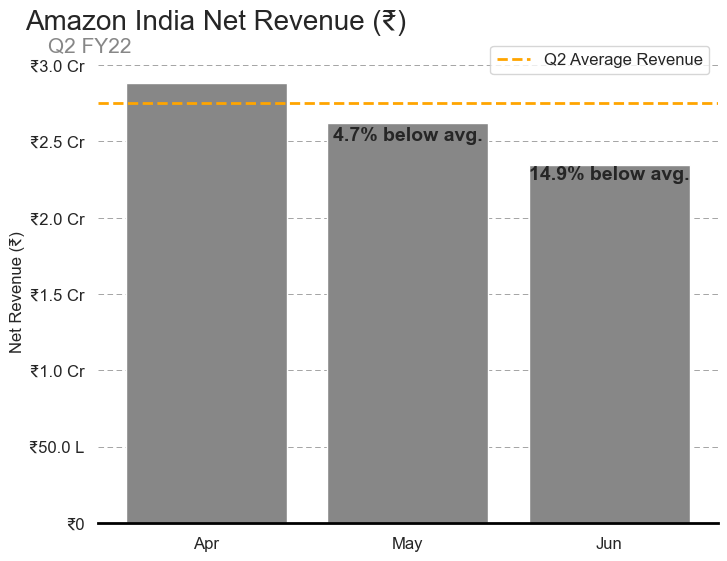

In [37]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

# Group the data by month and calculate the total sales revenue in ₹
monthly_sales = df.groupby(pd.Grouper(key='date', freq='ME')).agg({'order_amount': 'sum'})

# Get latest month revenue and average quarterly revenue
latest_month_revenue = monthly_sales.tail(1).iloc[0,0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean().iloc[0]


# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount'], color='#878787')

# Add percentage below average labels for intermediate months
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['order_amount']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height() - (0.07 * bar.get_height())), 
                xytext=(0, 5), textcoords='offset points', fontweight='bold', 
                ha='center', va='bottom', fontsize=14)

# Latest month label
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / avg_quarterly_revenue)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.', 
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height() - (0.07 * latest_bar.get_height())), 
            xytext=(0, 5), textcoords='offset points', fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# Average revenue line
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange', linewidth=2, label='Q2 Average Revenue')

# Titles and labels
ax.set_title('Amazon India Net Revenue (₹)', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)

# Format y-axis to show in lakhs or crores
def inr_format(x, pos):
    if x >= 1e7:
        return f'₹{x*1e-7:.1f} Cr'  # Crores
    elif x >= 1e5:
        return f'₹{x*1e-5:.1f} L'   # Lakhs
    else:
        return f'₹{x:,.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(inr_format))
ax.set_ylabel('Net Revenue (₹)', fontsize=12, labelpad=3)

# Grid & styling
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)
plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)
ax.tick_params(axis='both', labelsize=12)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()


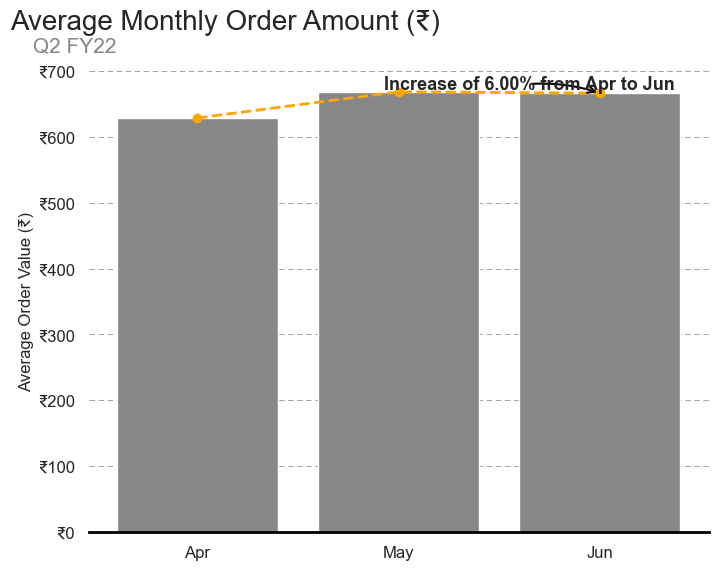

In [38]:
import matplotlib.ticker as ticker

# Group the data by month and calculate the average order value in ₹
monthly_aov = df.groupby(pd.Grouper(key='date', freq='ME')).agg({
    'order_amount': 'sum',
    'order_ID': 'nunique'
})
monthly_aov['average_order_value'] = monthly_aov['order_amount'] / monthly_aov['order_ID']

# Calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

# Create a barplot of the average order value per month
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=monthly_aov.index.strftime('%b'),
            y=monthly_aov['average_order_value'],
            ax=ax, color='#878787')

# Add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'),
        monthly_aov['average_order_value'],
        linestyle='--', linewidth=2, color='orange', marker='o')

# Add callout for percent increase from April to June
apr_val = monthly_aov['average_order_value'].iloc[0]
jun_val = monthly_aov['average_order_value'].iloc[2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',
            fontweight='bold',
            xy=(2, jun_val),
            xytext=(1.65, jun_val + 0.2),
            fontsize=13, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=-0.1"))

# Format y-axis with ₹
def inr_format(x, pos):
    return f"₹{x:,.0f}"
ax.yaxis.set_major_formatter(ticker.FuncFormatter(inr_format))

# Set labels and title
ax.set_title('Average Monthly Order Amount (₹)', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value (₹)', fontsize=12, labelpad=3)

# Grid lines
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()


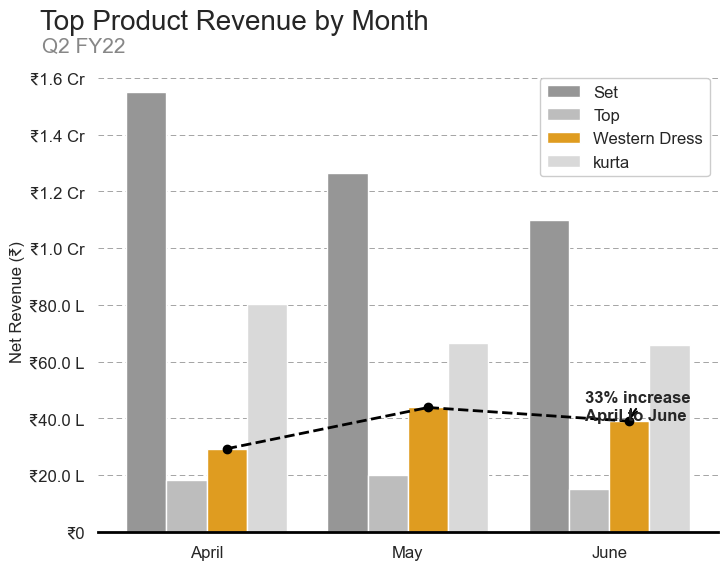

In [39]:
import matplotlib.ticker as ticker

# Define the desired order of months
month_order = ['April', 'May', 'June']

# Filter data for top product categories
sales_data = df[df['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])].copy()

# Ensure date column is datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract month name
sales_data['month'] = sales_data['date'].dt.month_name()

# Aggregate sales by month & category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount'].sum().reset_index()

# Set month order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='month', y='order_amount', hue='product_category', data=sales_by_month,
            palette=['#969696', '#bdbdbd', 'orange', '#d9d9d9'], ax=ax)

# Extract Western Dress sales & sort
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].copy()
sales_wd.sort_values(by='month', inplace=True)

# Add line plot for Western Dress trend
ax.plot([0.1, 1.1, 2.1], sales_wd['order_amount'], color='black', linestyle='--', linewidth=2, marker='o')

# Add annotation for percent increase April → June
pct_increase = ((sales_wd['order_amount'].iloc[2] - sales_wd['order_amount'].iloc[0]) /
                sales_wd['order_amount'].iloc[0]) * 100
ax.annotate(f'{pct_increase:.0f}% increase\nApril to June',
            fontweight='bold',
            xy=(2.1, sales_wd['order_amount'].iloc[2]),
            xytext=(1.88, sales_wd['order_amount'].iloc[2] + 40000),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=0.1"))

# INR formatting for y-axis
def inr_format(x, pos):
    if x >= 1e7:
        return f'₹{x/1e7:.1f} Cr'
    elif x >= 1e5:
        return f'₹{x/1e5:.1f} L'
    return f'₹{x:,.0f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(inr_format))

# Title and labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Net Revenue (₹)', fontsize=12, labelpad=3)

# Grid & styling
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

# Legend
plt.legend(bbox_to_anchor=(1, 1), fontsize=12, framealpha=1)

# Save & show plot
plt.show()
fig.savefig('Avg_MOV.png', dpi=300)


C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\2057790120.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category_pct.index,


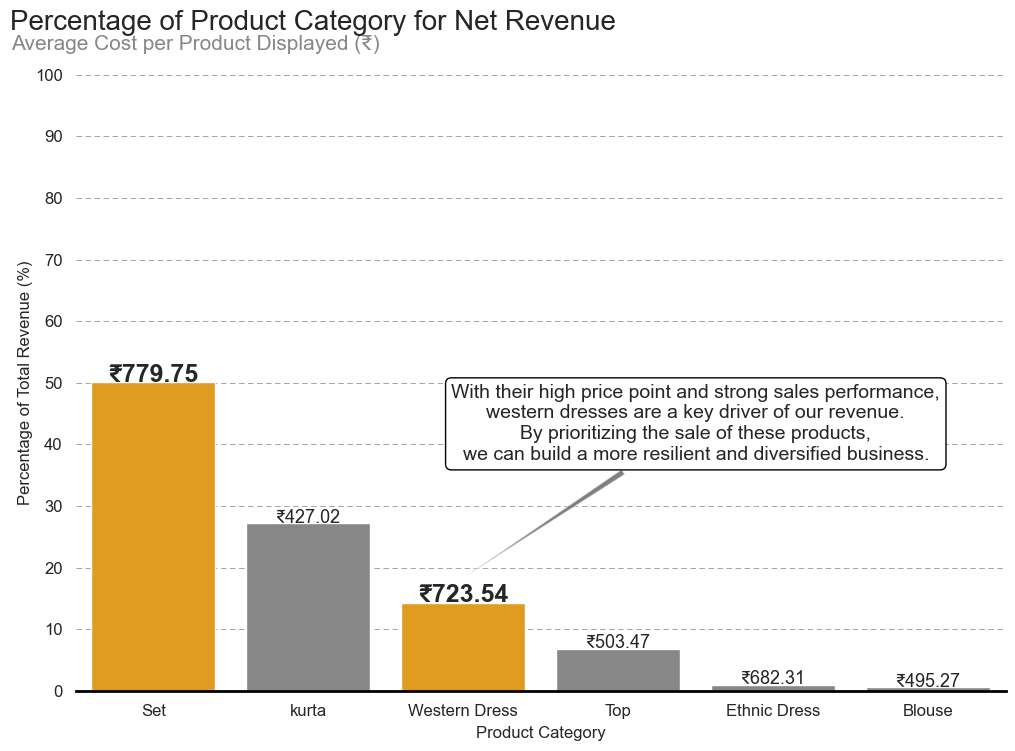

In [40]:
# Group the data by product category and calculate the total sales in ₹
sales_by_category = df.groupby('product_category')['order_amount'].sum()

# Categories to include
included_categories = ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
sales_by_category = sales_by_category.loc[included_categories]

# Total revenue
total_revenue = sales_by_category.sum()

# Percentage share for each category
sales_by_category_pct = (sales_by_category / total_revenue) * 100
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Bar chart
fig, ax = plt.subplots(figsize=(12, 8))
palette_colors = ['orange' if cat in ['Set', 'Western Dress'] else '#878787'
                  for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index,
            y=sales_by_category_pct.values,
            ax=ax, palette=palette_colors)

# Y-axis ticks (0–100%)
ax.set_yticks(list(range(0, 101, 10)))
ax.set_ylabel('Percentage of Total Revenue (%)', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed (₹)', fontsize=15, color='#878787', transform=ax.transAxes)

# Grid styling
ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Add average cost labels in ₹
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = df[df['product_category'] == category]['order_amount'].mean()
    label = f'₹{avg_cost:,.2f}'
    if category in ['Set', 'Western Dress']:
        ax.text(i, sales_by_category_pct.values[i] + .1, label, ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] + .1, label, ha='center', fontsize=13)

# Callout for Western Dress
western_sales = sales_by_category_pct['Western Dress']
western_index = sales_by_category_pct.index.get_loc('Western Dress')
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

x_pos = western_index
y_pos = western_sales + 2
x_text = x_pos + 0.5
y_text = y_pos - 8

ax.annotate(
    'With their high price point and strong sales performance,\n'
    'western dresses are a key driver of our revenue.\n'
    'By prioritizing the sale of these products,\n'
    'we can build a more resilient and diversified business.',
    xy=(x_pos, y_pos + 2),
    xytext=(x_text + 1, y_text + 35),
    fontsize=14,
    arrowprops=arrow_props,
    bbox=bbox_props,
    ha='center',
    va='center'
)

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Percent_Prod_Revenue.png', dpi=300)


C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\1900821608.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = df.groupby('size')['order_amount'].sum()
C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\1900821608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


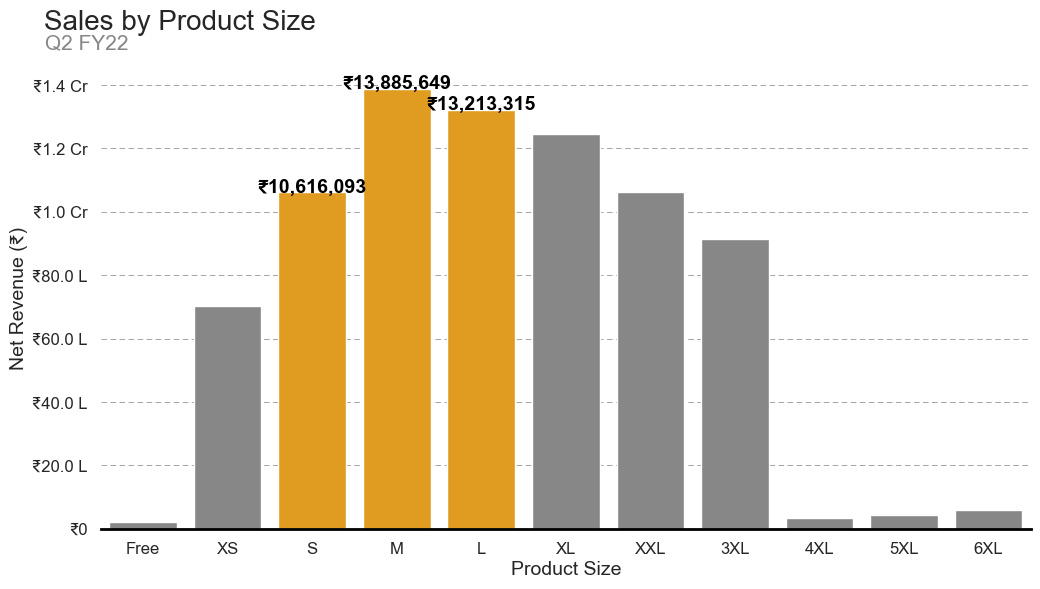

In [41]:
import matplotlib.ticker as ticker

# Group the data by product size and calculate total sales in ₹
sales_by_size = df.groupby('size')['order_amount'].sum()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Color palette to highlight S, M, L
palette_colors = ['orange' if size in ['S', 'M', 'L'] else '#878787' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)

# Axis labels & title
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue (₹)', labelpad=3, fontsize=14)
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

# INR formatting function
def inr_format(x, pos):
    if x >= 1e7:
        return f'₹{x/1e7:.1f} Cr'
    elif x >= 1e5:
        return f'₹{x/1e5:.1f} L'
    return f'₹{x:,.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(inr_format))

# Grid styling
ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Add annotations for S, M, L
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L']:
        ax.text(i, sales_by_size.values[i],
                f'₹{sales_by_size.values[i]:,.0f}',
                ha='center', fontsize=14, fontweight='bold', color='black')

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)


C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\3137941411.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'order_amount'))
C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\3137941411.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'order_amount'))
C:\Users\Prabhjot Singh\AppData\Local\Temp\ipykernel_13704\3137941411.py:29: F

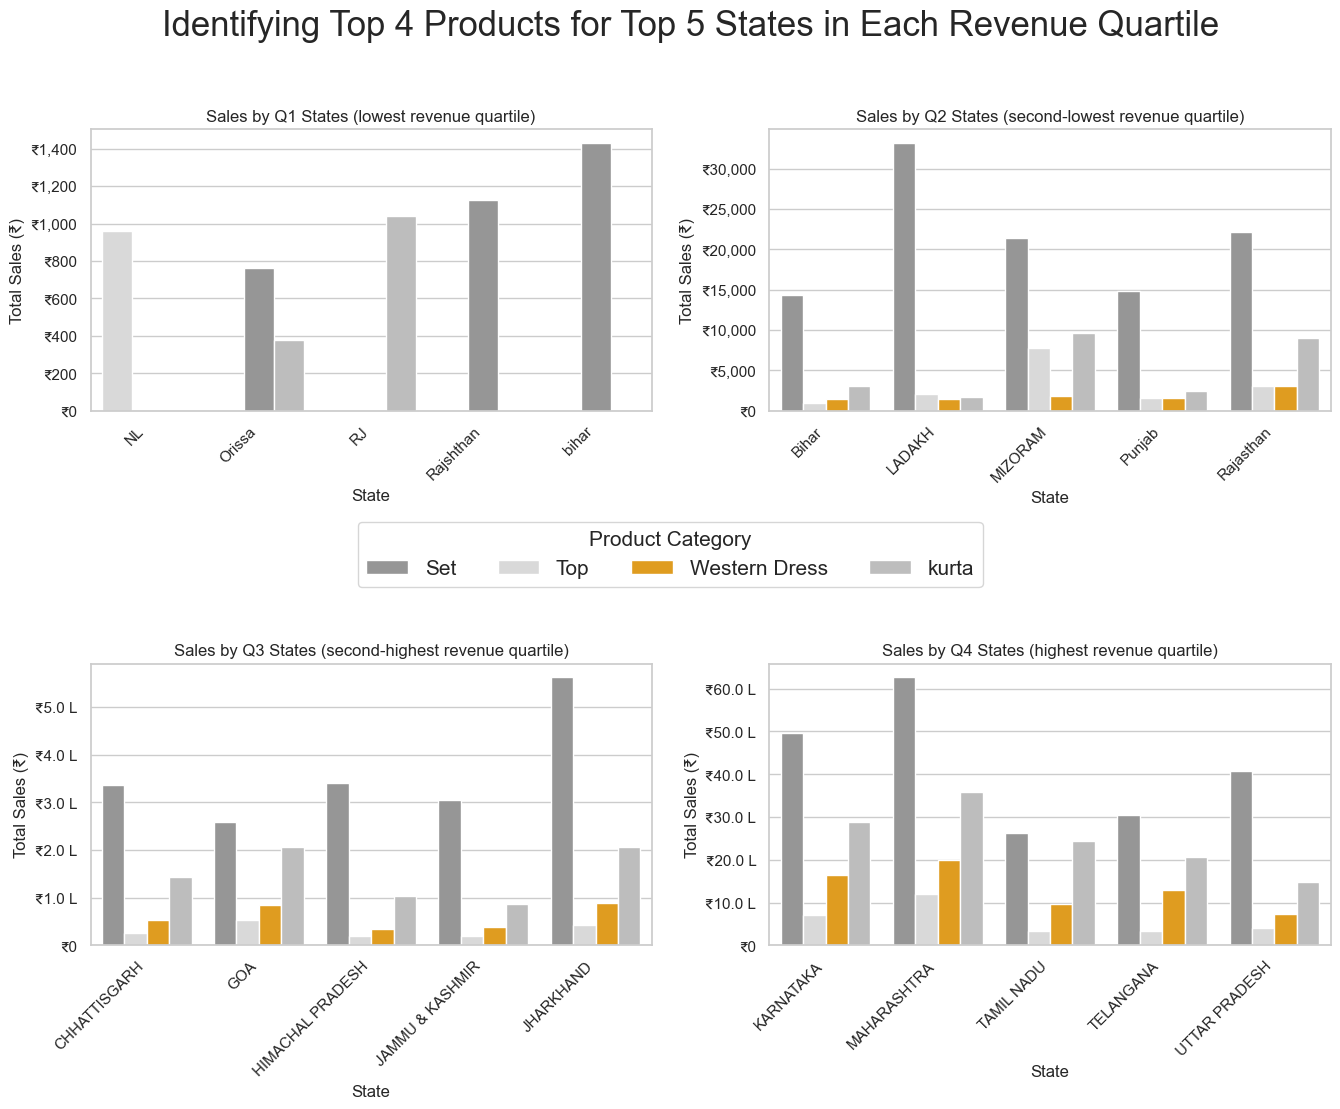

In [42]:
import matplotlib.ticker as ticker

# Define color palette for product categories
colors = {'Top': '#d9d9d9', 'Set': '#969696', 'kurta': '#bdbdbd', 'Western Dress': 'orange'}

# Group by state and calculate total sales (₹)
sales_by_state = df.groupby('state')['order_amount'].sum()

# Quartiles based on revenue
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Get top 5 states from each quartile
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(5).index.tolist()

# Filter only those states
top_sales = df[df['state'].isin(top_states)]

# Group by state & category
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount'].sum().reset_index()

# Get top 3 products for each quartile
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += (
        sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)]
        .groupby('state')
        .apply(lambda x: x.nlargest(3, 'order_amount'))
        ['product_category']
        .tolist()
    )

# INR formatting
def inr_format(x, pos):
    if x >= 1e7:
        return f'₹{x/1e7:.1f} Cr'
    elif x >= 1e5:
        return f'₹{x/1e5:.1f} L'
    return f'₹{x:,.0f}'

# Create subplots for each quartile
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

quartile_data = [
    ('Q1', 'Sales by Q1 States (lowest revenue quartile)', axs[0, 0]),
    ('Q2', 'Sales by Q2 States (second-lowest revenue quartile)', axs[0, 1]),
    ('Q3', 'Sales by Q3 States (second-highest revenue quartile)', axs[1, 0]),
    ('Q4', 'Sales by Q4 States (highest revenue quartile)', axs[1, 1])
]

for q_label, title, ax in quartile_data:
    q_sales = sales_by_state_product[
        sales_by_state_product['state'].isin(sales_by_state[quartiles == q_label].index)
    ]
    q_sales = q_sales[q_sales['product_category'].isin(top_products)]
    sns.barplot(x='state', y='order_amount', hue='product_category',
                data=q_sales, palette=colors, ax=ax)
    ax.legend().set_visible(False)
    ax.set_title(title)
    ax.set_xlabel('State')
    ax.set_ylabel('Total Sales (₹)')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(inr_format))

# Adjust layout
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# Rotate labels
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add one legend for all
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels),
           title='Product Category', fontsize=15, title_fontsize=15)

plt.suptitle("Identifying Top 4 Products for Top 5 States in Each Revenue Quartile", fontsize=25)
plt.show()
fig.savefig('Top_Products_Top_States.png', dpi=300)


In [43]:

# Rename properly if needed
df.rename(columns={'date': 'Date', 'amount': 'Amount'}, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert data types
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Now safely drop missing
if 'Date' in df.columns and 'Amount' in df.columns:
    df.dropna(subset=['Date', 'Amount'], inplace=True)

df.head()



,order_ID,Date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount,city,state,zip,promotion,customer_type,month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,customer,april
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,customer,april
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,april
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,customer,april
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,customer,april


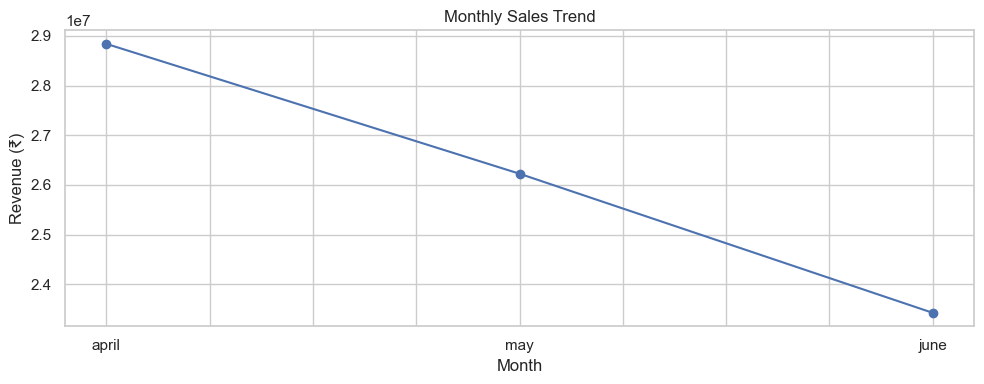

In [44]:
monthly_revenue = df.groupby('month', observed=False)['order_amount'].sum().sort_index()

plt.figure(figsize=(10, 4))
monthly_revenue.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
df['log_order_amount'] = np.log1p(df['order_amount'])

df[['order_amount', 'log_order_amount']].head()


,order_amount,log_order_amount
0,647.62,6.474847
1,406.00,6.008813
2,329.00,5.799093
3,753.33,6.625830
4,574.00,6.354370


In [46]:
# Encode B2B customer type
df['is_b2b'] = df['customer_type'].apply(lambda x: 1 if str(x).strip().lower() == 'b2b' else 0)

# Convert month name to numeric
month_map = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
df['month'] = df['month'].str.strip().str.lower().map(month_map)

# Drop rows with missing values in model input
df.dropna(subset=['month', 'order_quantity', 'order_amount'], inplace=True)

# Prepare features and target
X = df[['month', 'order_quantity', 'is_b2b']]
y = df['order_amount']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation (no deprecated args used)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ R² Score:", round(r2, 4))
print("✅ RMSE:", round(rmse, 2))


✅ R² Score: 0.1562
✅ RMSE: 287.86


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Choose columns to encode
categorical_cols = ['product_category', 'service_level']
numerical_cols = ['month', 'order_quantity', 'is_b2b']

# Drop rows with missing key values
df.dropna(subset=categorical_cols + numerical_cols + ['order_amount'], inplace=True)

X = df[categorical_cols + numerical_cols]
y = df['order_amount']

# Pipeline: encoding + model
ct = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

pipeline = make_pipeline(ct, RandomForestRegressor(n_estimators=100, random_state=42))

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate
print("✅ R² Score:", round(r2_score(y_test, y_pred), 4))
print("✅ RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


✅ R² Score: 0.5089
✅ RMSE: 219.6
